<a href="https://colab.research.google.com/github/Alan-Cheong/IEEE_QW_2020/blob/master/CBD_Grade_A_Rents_Q4_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

alancheongmuncheong_cbd_grade_a_office_rents_q42024_path = kagglehub.dataset_download('alancheongmuncheong/cbd-grade-a-office-rents-q42024')

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler


import os

# Check available files
base_path = '/kaggle/input/cbd-grade-a-office-rents-q42024'
for root, dirs, files in os.walk(base_path):
    print(f"Root: {root}")
    print(f"Directories: {dirs}")
    print(f"Files: {files}")


# Load the data
#file_path = r'C:\Users\alan.cheong\Desktop\Research Paper\Real Estate Analysis\SVM\CBD Office Rents.xlsx'
#df = pd.read_excel(file_path)
df = pd.read_excel('/kaggle/input/cbd-grade-a-office-rents-q42024/Rents Grade A Office 4Q2024.xlsx')

#df = pd.read_excel('C:/Users/alan.cheong/Desktop/Research Paper/Real Estate Analysis/SVM/CBD Office Rents.xlsx')
#df = pd.read_excel(r'C:\Users\alan.cheong\Desktop\Research Paper\Real Estate Analysis\SVM\CBD Office Rents.xlsx')

# Path to the specific file
#file_path = '/kaggle/input/CBD Office Rents Q4/2024'

# Load the Excel into a pandas DataFrame
#df = pd.read_excel(file_path)

# Display the first few rows
print(df.head())


# Convert Grade and Location to numerical representations
le_grade = LabelEncoder()
le_location = LabelEncoder()
df['Grade'] = le_grade.fit_transform(df['Grade'])
df['Location '] = le_location.fit_transform(df['Location'])

# Scale the Rent column
scaler = StandardScaler()
df['Rent'] = scaler.fit_transform(df[['Rent']])

print(df['Rent'])

# Retrieve the original class labels
grade_classes = le_grade.classes_
location_classes = le_location.classes_

# Example: Get the original category for a numerical label (that is what was it named before it was converted to a numerical value)
numerical_label = 2  # Replace with the label you want to decode

original_grade = grade_classes[numerical_label]
#print("Original Grade for label", numerical_label, ":", original_grade)

numerical_label_project = 1  # Replace with the label you want to decode

original_location = location_classes[numerical_label_project]
#print("Original Project Name for label", numerical_label_project, ":", original_project_name)

# Print all Grade labels with their corresponding numerical values
print("Grade and their corresponding numbers:")
for number, label in enumerate(grade_classes):
    print(f"Label {number}: {label}")

# Print all Project Name labels with their corresponding numerical values
print("\nLocation and their corresponding numbers:")
for number, label in enumerate(location_classes):
    print(f"Label {number}: {label}")

Root: /kaggle/input/cbd-grade-a-office-rents-q42024
Directories: []
Files: ['Rents Grade A Office 4Q2024.xlsx']
  Grade            Project Name       Location   Rent
0   AAA            OUE Bayfront  Raffles Place  14.25
1   AAA            MBFC Tower 1     Marina Bay  12.65
2   AAA            MBFC Tower 2     Marina Bay  12.65
3   AAA            MBFC Tower 3     Marina Bay  12.65
4   AAA  Ocean Financial Centre  Raffles Place  12.80
0     2.459389
1     1.500976
2     1.500976
3     1.500976
4     1.590827
        ...   
73    0.153208
74   -0.116346
75   -1.733667
76   -1.733667
77   -1.374263
Name: Rent, Length: 78, dtype: float64
Grade and their corresponding numbers:
Label 0: A
Label 1: AA
Label 2: AAA

Location and their corresponding numbers:
Label 0: Beach Road/ Middle Road
Label 1: City Hall
Label 2: Marina Bay
Label 3: Orchard Road
Label 4: Raffles Place
Label 5: Shenton Way
Label 6: Tanjong Pagar


<ipython-input-25-1cf20cf33780>:23: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter([], [], c=colors[i], label=f'Grade {grade}')


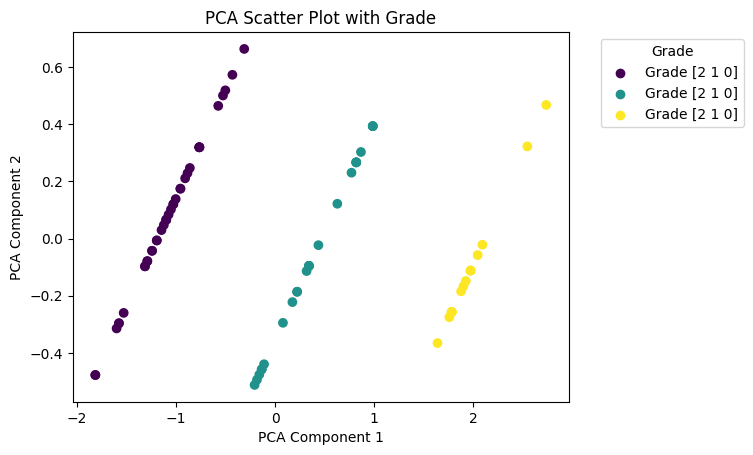

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

pca = PCA(n_components=2)
pca_result = pca.fit_transform(df[['Grade', 'Rent']])

#plt.scatter(pca_result[:,0], pca_result[:,1], c=df['Grade'])
#plt.show()

# Create a scatter plot with a color map
scatter = plt.scatter(pca_result[:,0], pca_result[:,1], c=df['Grade'], cmap='viridis')

# Add color bar for reference
#plt.colorbar(scatter, label='Grade')

# Optionally create a custom legend using the unique postal districts
grade = df['Grade'].unique()
colors = scatter.cmap(np.linspace(0, 1, len(grade)))

# Create legend with labels for each grade
for i, district in enumerate(grade):
    plt.scatter([], [], c=colors[i], label=f'Grade {grade}')

# Position the legend outside the plot
plt.legend(title='Grade', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('PCA Scatter Plot with Grade')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

# Show the plot
plt.show()

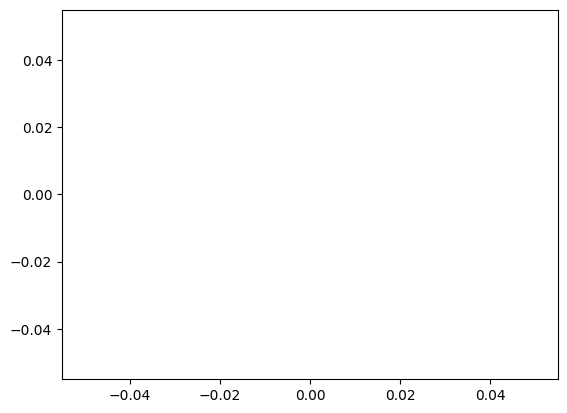

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
<ipython-input-22-dc51863e3b47>:10: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x='Rent', hue='Grade', fill=True)


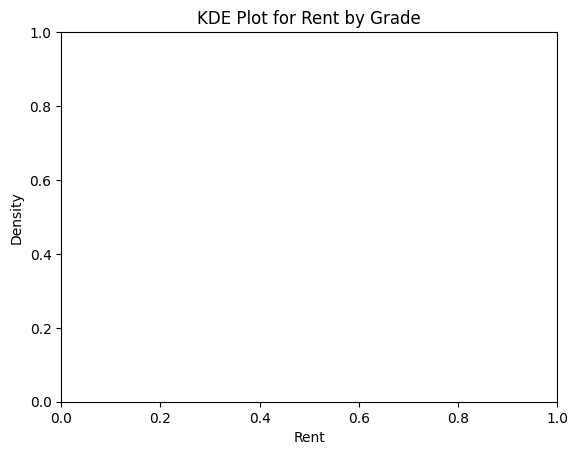

In [ ]:
!pip install seaborn
import seaborn as sns

sns.scatterplot(data=df, x='Grade', y='Rent')
plt.show()

grade_mapping = {0: 'Grade A', 1: 'Grade AA', 2: 'Grade AAA'}
df['Grade'] = df['Grade'].map(grade_mapping)

sns.kdeplot(data=df, x='Rent', hue='Grade', fill=True)

# Add labels and show plot
plt.title('KDE Plot for Rent by Grade')
plt.xlabel('Rent')
plt.ylabel('Density')
plt.show()